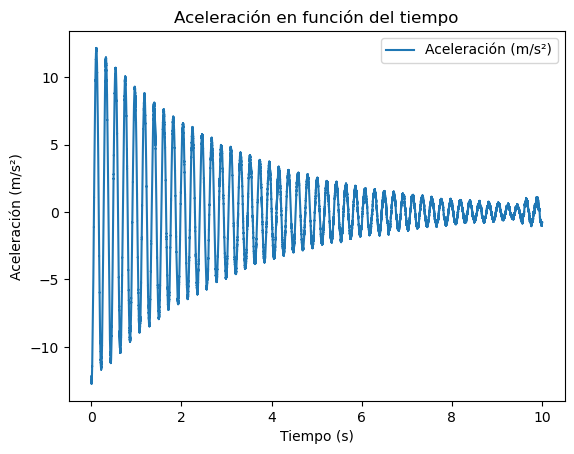

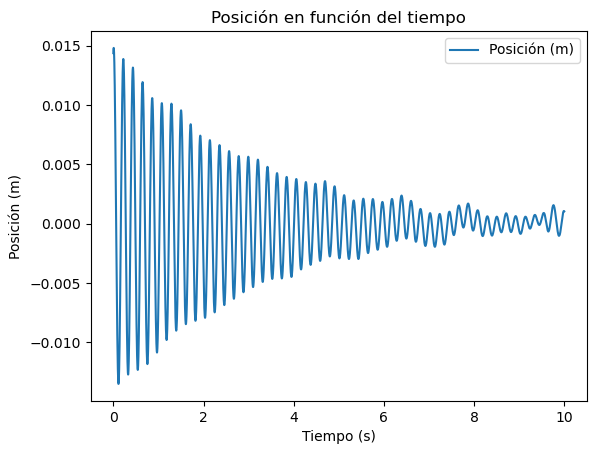

,tiempo,aceleracion,velocidad,posicion
0,0.000000,-12.189244,0.000000,0.014364
1,0.000098,-12.231512,-0.001190,0.014375
2,0.000195,-12.246259,-0.002385,0.014385
3,0.000293,-12.223651,-0.003581,0.014395
4,0.000391,-12.222288,-0.004774,0.014404
...,...,...,...,...
102396,9.999610,-0.792781,-0.111528,0.001037
102397,9.999707,-0.782349,-0.111606,0.001037
102398,9.999805,-0.777195,-0.111682,0.001036
102399,9.999902,-0.760049,-0.111758,0.001035


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend

def calcular_posicion(path, time1):
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"])
    
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81

    # Inicializar velocidad y posición
    velocidades = [0]  # Suponemos que la velocidad inicial es 0
    posiciones = [1]   # Suponemos que la posición inicial es 0

    # Iterar para calcular la velocidad y posición en cada instante de tiempo
    for i in range(1, len(data)):
        # Calcular dt como la diferencia de tiempo entre t+1 y t
        dt = data["tiempo"].iloc[i] - data["tiempo"].iloc[i - 1]
        
        # Calcular dv como a(t) * dt
        dv = data["aceleracion"].iloc[i - 1] * dt
        
        # Calcular la velocidad en t+1
        v_t_plus_1 = velocidades[-1] + dv
        velocidades.append(v_t_plus_1)
        
        # Calcular la posición en t+1 usando la velocidad actual
        x_t_plus_1 = posiciones[-1] + velocidades[-1] * dt
        posiciones.append(x_t_plus_1)

    posiciones = np.array(posiciones) # Ajuste de escala
    
    # Aplicar detrend para eliminar la tendencia lineal
    posiciones = detrend(posiciones)

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidades
    data["posicion"] = posiciones

    # Graficar aceleración vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    plt.title("Posición en función del tiempo")
    plt.legend()
    plt.show()

    return data

# Llama 
# a la función con el archivo adecuado y el tiempo de corte
calcular_posicion(r"c:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\DataRecor2.csv", 10)


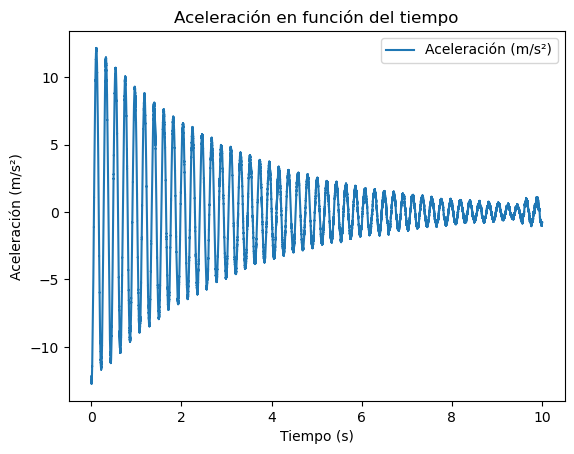

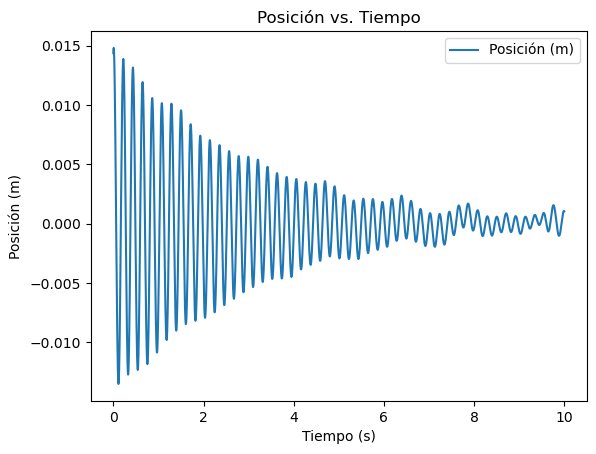

KeyError: ('tiempo', 'posicion')

In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt


def integrar(path, time1):
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"])
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()


    return data["posicion"]

# Llama a la función con el archivo adecuado y el tiempo de corte
# integrar("ruta_del_archivo.csv", tiempo_final)


# Llama a la función con el archivo adecuado y el tiempo de corte
# integrar("ruta_del_archivo.csv", tiempo_final)


posiciones1=integrar(r"c:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\DataRecor2.csv",10)


In [16]:
import pandas as pd
import numpy as np
from scipy.integrate import cumtrapz
from scipy.signal import detrend
import matplotlib.pyplot as plt

def integrar(path, time1, muestreo):
    output_filename=rf"C:\Users\chelo\Documents\Vibras laboratorio 2\Pos vs tiempo {muestreo} Hz (de muestreo).csv"
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"])
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + " " + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]

# Llama a la función con el archivo adecuado, tiempo de corte y nombre de salida


In [18]:
"""MUESTREOS"""
#640 Hz
w640=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\DataRecor2.csv"
#1280 hz
w1280=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-02)\DataRecor2.csv"
#2560 hz
w2560=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-33)\DataRecor2.csv"
#5120 hz 
w5120= r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-10)\DataRecor2.csv"
#10240hz
w10240=r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv"

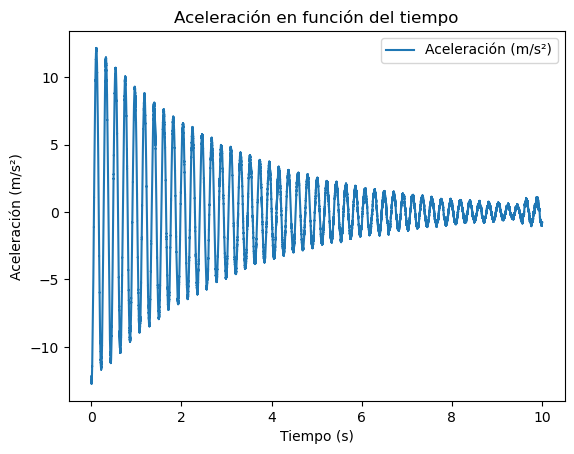

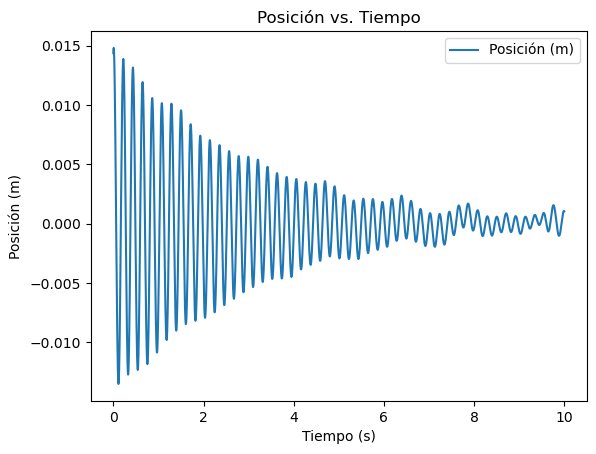

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def frecuencia_natural(path, time1=10):
    tabla = pd.read_csv(path, sep="\t", names=["tiempo", "posición"])

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values

    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)  # Más puntos para una mejor resolución de picos
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()


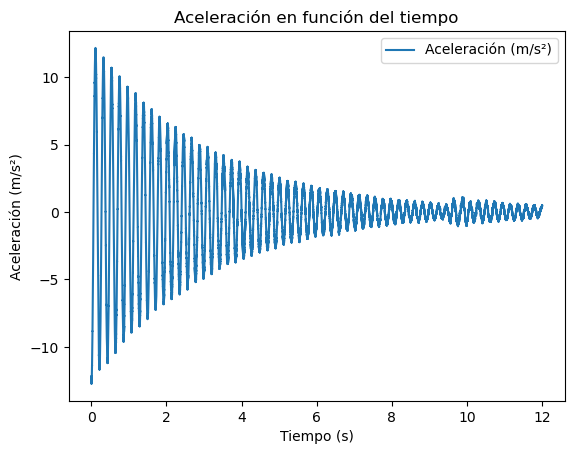

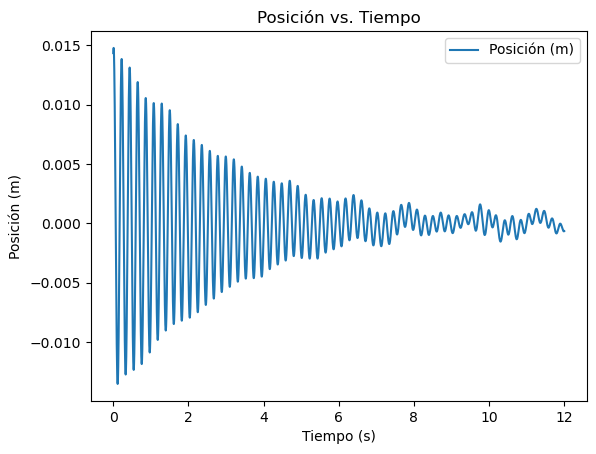

0         0.014341
1         0.014351
2         0.014361
3         0.014371
4         0.014381
            ...   
122876   -0.000659
122877   -0.000659
122878   -0.000658
122879   -0.000658
122880   -0.000658
Name: posicion, Length: 122881, dtype: float64

In [24]:
integrar(w640,12,6401)

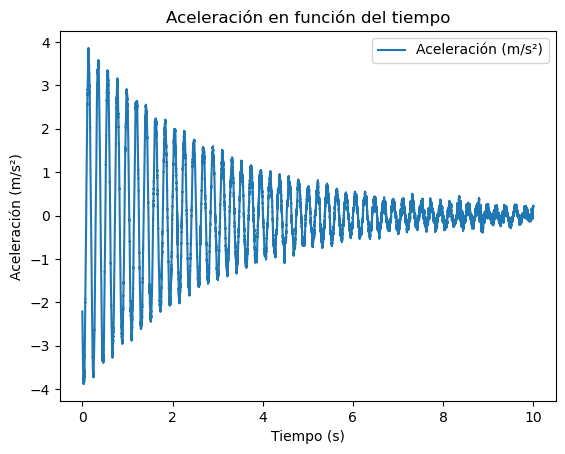

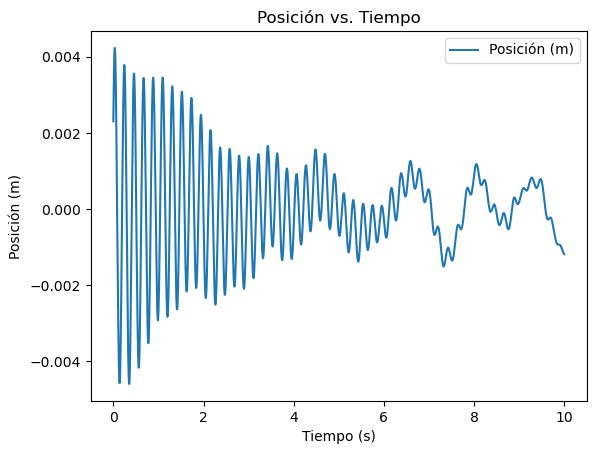

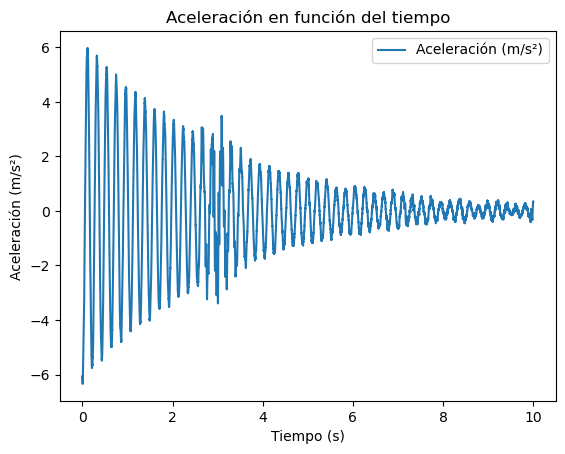

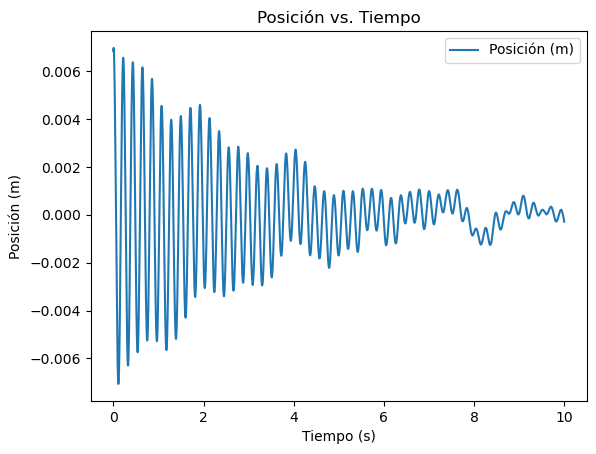

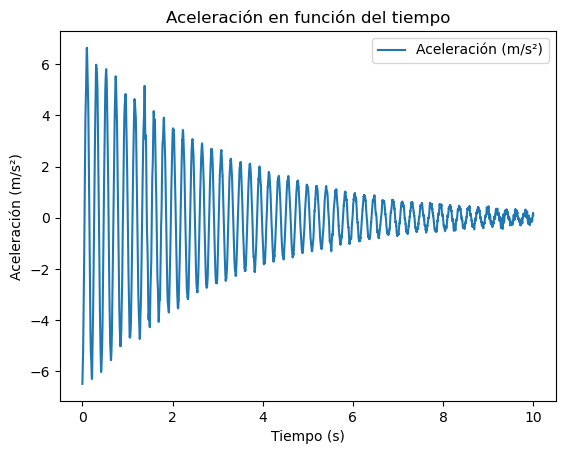

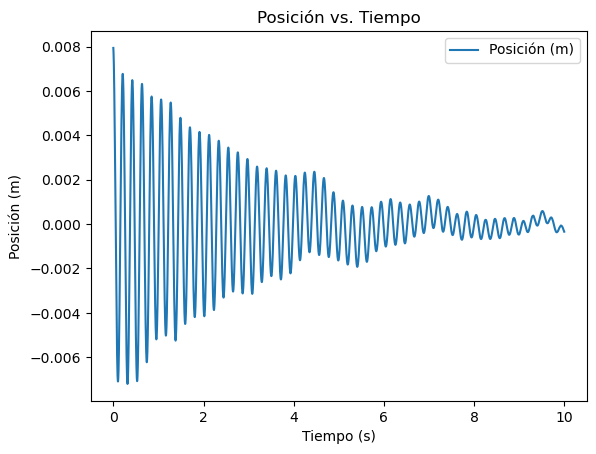

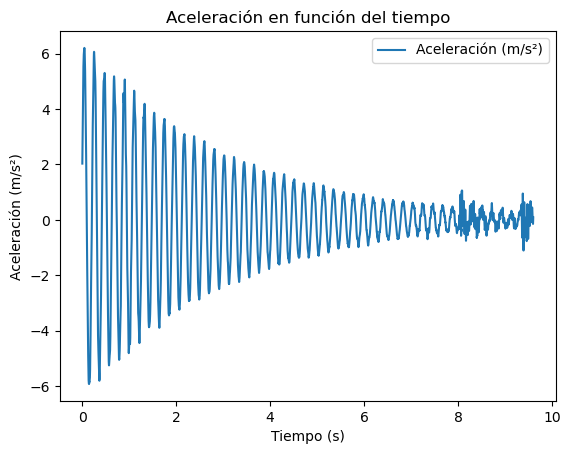

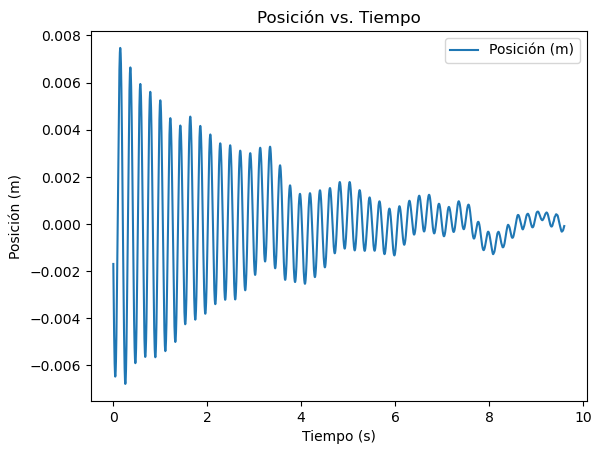

0      -0.001697
1      -0.002007
2      -0.002312
3      -0.002611
4      -0.002902
          ...   
6139   -0.000133
6140   -0.000122
6141   -0.000111
6142   -0.000100
6143   -0.000089
Name: posicion, Length: 6144, dtype: float64

In [19]:
integrar(w1280, 10, 1280)
integrar(w2560, 10, 2560)
integrar(w5120, 10, 5120)
integrar(w10240, 10,10240)



In [20]:
"""POSICIONES VS TIEMPO"""
posicion640=r"C:\Users\chelo\Documents\Vibras laboratorio 2\Pos vs tiempo 640 Hz (de muestreo).csv"
posicion1280=r"C:\Users\chelo\Documents\Vibras laboratorio 2\Pos vs tiempo 1280 Hz (de muestreo).csv"
posicion2560=r"C:\Users\chelo\Documents\Vibras laboratorio 2\Pos vs tiempo 2560 Hz (de muestreo).csv"
posicion5120=r"C:\Users\chelo\Documents\Vibras laboratorio 2\Pos vs tiempo 5120 Hz (de muestreo).csv"
posicion10240=r"C:\Users\chelo\Documents\Vibras laboratorio 2\Pos vs tiempo 10240 Hz (de muestreo).csv"




In [45]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def frecuencia_natural(path, time1=10):
    # Cargar los datos y asegurar que se lean como texto
    tabla = pd.read_csv(path, sep="\t", header=None, names=["tiempo_posicion"], dtype={"tiempo_posicion": str})
    
    # Separar los valores en las columnas 'tiempo' y 'posición'
    tabla[['tiempo', 'posición']] = tabla['tiempo_posicion'].str.split(' ', expand=True).astype(float)

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values

    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()



A = -0.0073497556883224974, B = 0.34068996439353627, frecuencia = 4.710087543420524, phi = 0.24615634101657277
Delta entre pico 1 y pico 2: 0.0750
Delta entre pico 2 y pico 3: 0.0789
Delta entre pico 3 y pico 4: 0.0680
Delta entre pico 4 y pico 5: 0.0681
Delta entre pico 5 y pico 6: 0.0720
Delta entre pico 6 y pico 7: 0.0759
Delta entre pico 7 y pico 8: 0.0792
Delta entre pico 8 y pico 9: 0.0651
Delta entre pico 9 y pico 10: 0.0690
Delta entre pico 10 y pico 11: 0.0729
Delta entre pico 11 y pico 12: 0.0768
Delta entre pico 12 y pico 13: 0.0758
Delta entre pico 13 y pico 14: 0.0661
Delta entre pico 14 y pico 15: 0.0699
Delta entre pico 15 y pico 16: 0.0738
Delta entre pico 16 y pico 17: 0.0777
Delta entre pico 17 y pico 18: 0.0724
Delta entre pico 18 y pico 19: 0.0670
Delta entre pico 19 y pico 20: 0.0708
Delta entre pico 20 y pico 21: 0.0747
Delta entre pico 21 y pico 22: 0.0786
Delta entre pico 22 y pico 23: 0.0690
Delta entre pico 23 y pico 24: 0.0679
Delta entre pico 24 y pico 25: 0

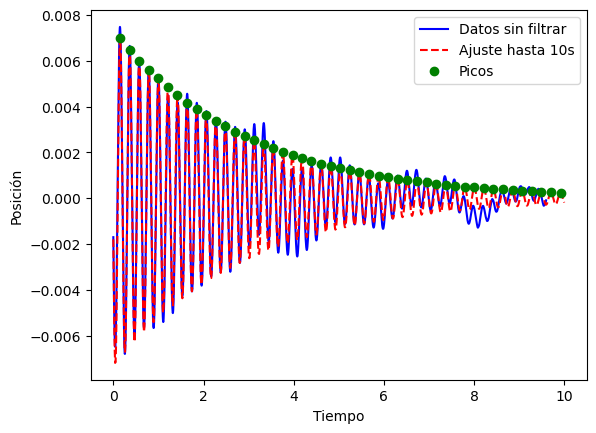

In [46]:
frecuencia_natural(r"C:\Users\chelo\Documents\Vibras laboratorio 2\Pos vs tiempo 640 Hz (de muestreo).csv",10)

A = -0.007779612644936737, B = 0.33476009938376716, frecuencia = 4.709154937577501, phi = -1.534709699791732
Delta entre pico 1 y pico 2: 0.0741
Delta entre pico 2 y pico 3: 0.0782
Delta entre pico 3 y pico 4: 0.0649
Delta entre pico 4 y pico 5: 0.0674
Delta entre pico 5 y pico 6: 0.0714
Delta entre pico 6 y pico 7: 0.0754
Delta entre pico 7 y pico 8: 0.0749
Delta entre pico 8 y pico 9: 0.0647
Delta entre pico 9 y pico 10: 0.0687
Delta entre pico 10 y pico 11: 0.0727
Delta entre pico 11 y pico 12: 0.0768
Delta entre pico 12 y pico 13: 0.0700
Delta entre pico 13 y pico 14: 0.0660
Delta entre pico 14 y pico 15: 0.0700
Delta entre pico 15 y pico 16: 0.0740
Delta entre pico 16 y pico 17: 0.0781
Delta entre pico 17 y pico 18: 0.0652
Delta entre pico 18 y pico 19: 0.0673
Delta entre pico 19 y pico 20: 0.0713
Delta entre pico 20 y pico 21: 0.0754
Delta entre pico 21 y pico 22: 0.0752
Delta entre pico 22 y pico 23: 0.0646
Delta entre pico 23 y pico 24: 0.0686
Delta entre pico 24 y pico 25: 0.0

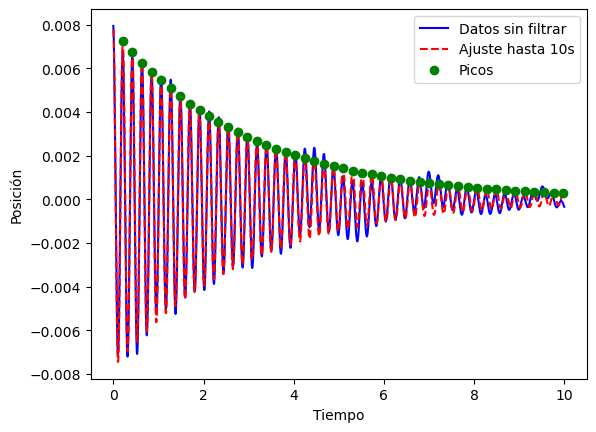

In [43]:
frecuencia_natural(r"C:\Users\chelo\Documents\Vibras laboratorio 2\Pos vs tiempo 1280 Hz (de muestreo).csv",10)

In [44]:
frecuencia_natural(w2560,10)

ValueError: could not convert string to float: ''

In [47]:
frecuencia_natural(w640,10)




ValueError: could not convert string to float: ''